# Cat vs. Dog Classifier Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

warnings.filterwarnings("ignore")
%matplotlib inline

tf.__version__

'2.17.1'

## Dataset

The full dataset is available [here](https://drive.google.com/file/d/1v2hL8Vz0w0d12HmHWoOL3m2bp75W1R6M/view?usp=sharing).

In [2]:
SEED = 42
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# training set
train_dataset = image_dataset_from_directory(
    #"./00_data/dataset/training_set",
    "/kaggle/input/cat-and-dog/training_set/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
# validation set
val_dataset = image_dataset_from_directory(
    #"./00_data/dataset/training_set",
    "/kaggle/input/cat-and-dog/training_set/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
# test set
test_dataset = image_dataset_from_directory(
    #"./00_data/dataset/test_set",
    "/kaggle/input/cat-and-dog/test_set/test_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.
Found 2023 files belonging to 2 classes.


In [4]:
class_names = train_dataset.class_names
print(f"Classes: {class_names}")

Classes: ['cats', 'dogs']


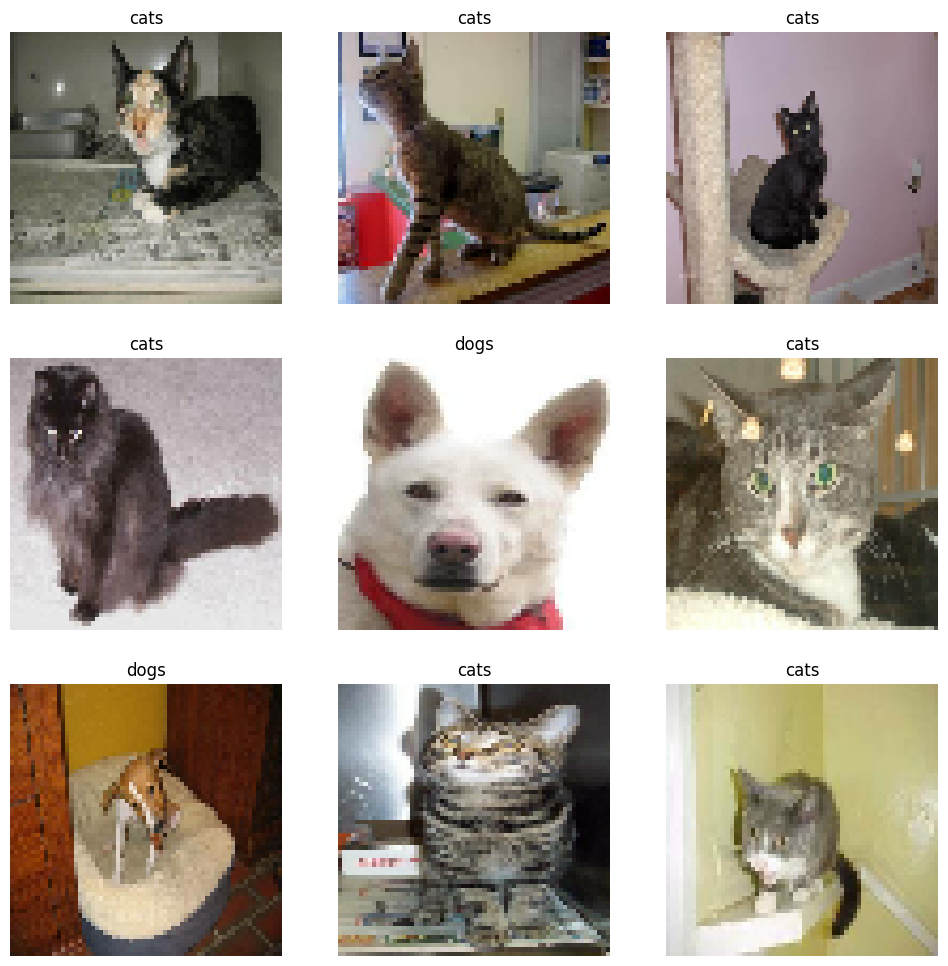

In [5]:
plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

## Building the CNN

In [6]:
# init CNN
cnn = tf.keras.models.Sequential([
    # data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    
    tf.keras.layers.Rescaling(1./255),
    # first conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # second conv
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # third conv
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    # flattening
    tf.keras.layers.Flatten(),
    # fully connected layer
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
# compiling the CNN
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# training the CNN
history = cnn.fit(x = train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5034 - loss: 0.6951 - val_accuracy: 0.6352 - val_loss: 0.6402
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6004 - loss: 0.6657 - val_accuracy: 0.6482 - val_loss: 0.6298
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6335 - loss: 0.6495 - val_accuracy: 0.6892 - val_loss: 0.6101
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6397 - loss: 0.6290 - val_accuracy: 0.6897 - val_loss: 0.5857
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6458 - loss: 0.6308 - val_accuracy: 0.6967 - val_loss: 0.6118
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6746 - loss: 0.6037 - val_accuracy: 0.7041 - val_loss: 0.5775
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6866 - loss: 0.5817 - val_accuracy: 0.7011 - val_loss: 0.5768
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6967 - loss: 0.5760 - val_accuracy: 

In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast (RandomContrast)     │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_brightness (RandomBrightness) │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,820,229 (14.57 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,546,820 (9.72 MB)

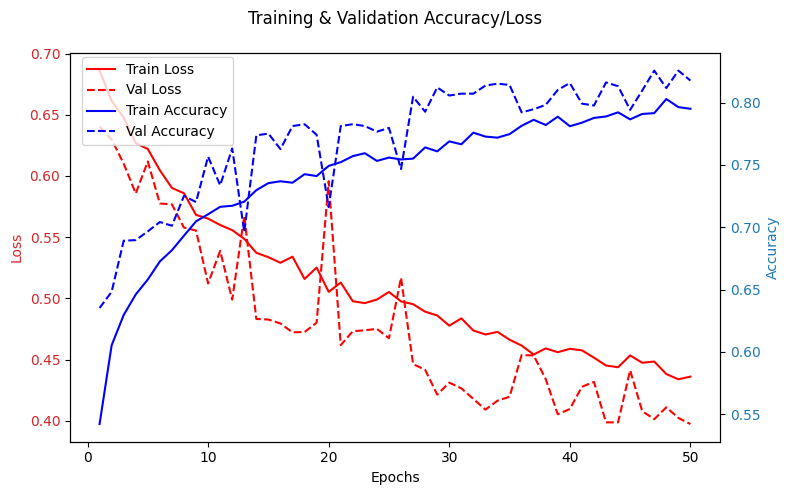

In [10]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, 'r-', label="Train Loss")
ax1.plot(epochs, val_loss, 'r--', label="Val Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, 'b-', label="Train Accuracy")
ax2.plot(epochs, val_acc, 'b--', label="Val Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Training & Validation Accuracy/Loss')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

In [11]:
loss, accuracy = cnn.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8345 - loss: 0.3852
Test Accuracy: 0.8255


In [12]:
test_labels = []

for images, labels in test_dataset:
    for i in range(len(labels)):
        test_labels.append(labels[i])

test_labels = np.array(test_labels)

y_pred = cnn.predict(test_dataset)

y_pred = y_pred.flatten() > 0.5

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Figure size 1200x800 with 0 Axes>

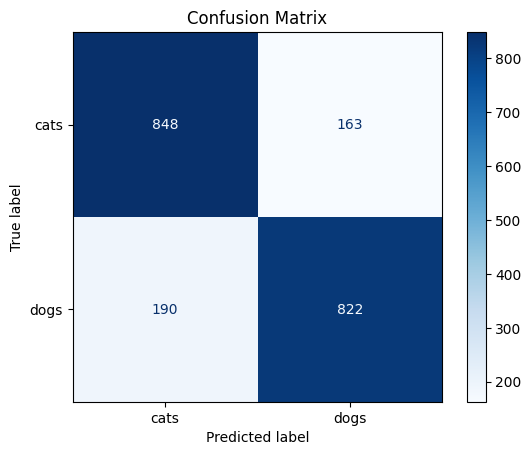

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(12, 8))

cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

disp.plot(cmap=plt.cm.Blues, colorbar=True)
plt.title("Confusion Matrix")

plt.show()

## Prediction

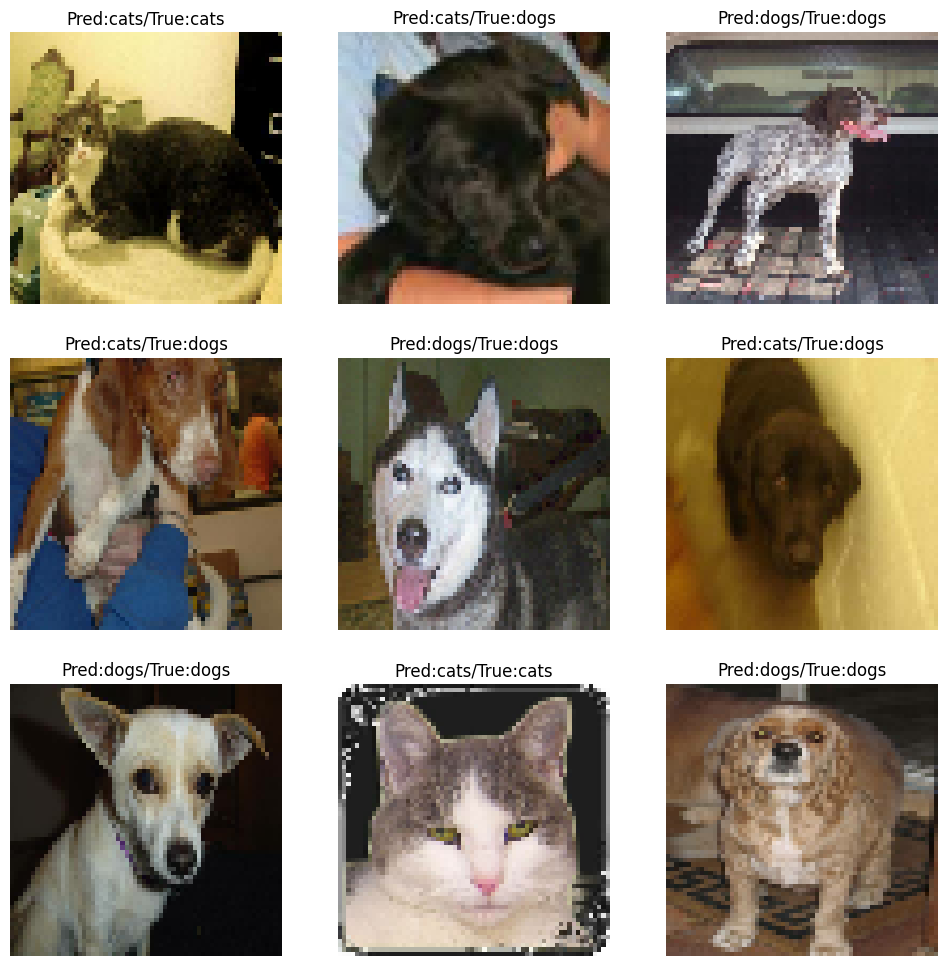

In [14]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # prepocess photo
        img_x = tf.expand_dims(images[i], axis=0)  # Добавляем batch dimension
        
        # predict
        result = cnn.predict(img_x, verbose=False)
        prediction = class_names[0 if result[0][0] < 0.5 else 1]
        
        plt.title(f"Pred:{prediction}/True:{class_names[labels[i]]}")
        plt.axis("off")

plt.show()

## Hyperparameters Tuning

In [15]:
!pip install bayesian-optimization

In [16]:
import contextlib
import os

from tensorflow.keras.preprocessing import image_dataset_from_directory

def silent_image_dataset_from_directory(*args, **kwargs):
    with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
        return image_dataset_from_directory(*args, **kwargs)

def load_data(batch_size = 32):
    # training set
    train_dataset = silent_image_dataset_from_directory(
        #"./00_data/dataset/training_set",
        "/kaggle/input/cat-and-dog/training_set/training_set",
        labels="inferred",
        image_size=IMAGE_SIZE,
        batch_size=batch_size,
        label_mode="int",
        shuffle=True,
        validation_split=0.25,
        subset="training",
        seed=SEED
    )
    # validation set
    val_dataset = silent_image_dataset_from_directory(
        #"./00_data/dataset/training_set",
        "/kaggle/input/cat-and-dog/training_set/training_set",
        labels="inferred",
        image_size=IMAGE_SIZE,
        batch_size=batch_size,
        label_mode="int",
        shuffle=True,
        validation_split=0.25,
        subset="validation",
        seed=SEED
    )
    # test set
    test_dataset = silent_image_dataset_from_directory(
        #"./00_data/dataset/test_set",
        "/kaggle/input/cat-and-dog/test_set/test_set",
        labels="inferred",
        image_size=IMAGE_SIZE,
        batch_size=batch_size,
        label_mode="int",
        shuffle=True
    )
    return train_dataset, val_dataset, train_dataset

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

def evaluate_NN_params(activation, learning_rate, batch_size, epochs):
    # ranges
    activation_names = ['relu', 'sigmoid', 'softplus', 
                        'softsign', 'tanh', 'selu',
                        'elu', 'exponential', LeakyReLU(0.1)]
    batch_size_range = np.logspace(3, 9, num=7, base=2, dtype=int)
    epochs_range = np.arange(25, 105, 5)
    learning_rate_range = np.logspace(-2, -6, num=5)
    # params
    activation = activation_names[int(round(activation))]
    batch_size = batch_size_range[int(round(batch_size))]
    epochs = epochs_range[int(round(epochs))]
    learning_rate = learning_rate_range[int(round(learning_rate))]
    # create NN
    def create_NN():
        cnn = tf.keras.models.Sequential([
            # data augmentation
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.2),
            tf.keras.layers.RandomZoom(0.2),
            tf.keras.layers.RandomContrast(0.2),
            tf.keras.layers.RandomBrightness(0.2),
            tf.keras.layers.Rescaling(1./255),
            # first conv
            tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                                   activation=activation, 
                                   input_shape=(64, 64, 3)),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            # second conv
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                   activation=activation),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            # third conv
            tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                   activation=activation),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            # flattening
            tf.keras.layers.Flatten(),
            # fully connected layer
            tf.keras.layers.Dense(256, activation=activation),
            tf.keras.layers.Dropout(0.25),
            
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                        loss="binary_crossentropy", metrics=["accuracy"])
        return cnn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=10)
    nn = create_NN()
    # reload data with a new batch size
    train_dataset, val_dataset, test_dataset = load_data(batch_size)
    nn.fit(x = train_dataset, validation_data=val_dataset, 
           epochs=epochs, verbose=0)
    # evaluate params on validation set
    _, accuracy = nn.evaluate(val_dataset, verbose=0) 
    
    return accuracy

In [18]:
from bayes_opt import BayesianOptimization

# float indexes
params_nn ={
    'activation':(0, 8),
    'learning_rate':(0, 4),
    'batch_size':(0, 6),
    'epochs':(0, 15)
}

optimizer = BayesianOptimization(evaluate_NN_params, params_nn, random_state=SEED)
optimizer.maximize(init_points=25, n_iter=10)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |
-------------------------------------------------------------------------
| 1         | 0.7251    | 2.996     | 5.704     | 10.98     | 2.395     |
| 2         | 0.4978    | 1.248     | 0.936     | 0.8713    | 3.465     |
| 3         | 0.5752    | 4.809     | 4.248     | 0.3088    | 3.88      |
| 4         | 0.4978    | 6.66      | 1.274     | 2.727     | 0.7336    |
| 5         | 0.5022    | 2.434     | 3.149     | 6.479     | 1.165     |
| 6         | 0.7711    | 4.895     | 0.837     | 4.382     | 1.465     |
| 7         | 0.7021    | 3.649     | 4.711     | 2.995     | 2.057     |
| 8         | 0.7121    | 4.739     | 0.2787    | 9.113     | 0.6821    |
| 9         | 0.4978    | 0.5204    | 5.693     | 14.48     | 3.234     |
| 10        | 0.4978    | 2.437     | 0.586     | 10.26     | 1.761     |
| 11        | 0.4978    | 0.9763    | 2.971     | 0.5158    | 3.637     |
| 12        | 0.4978    | 2.07      | 

In [19]:
# best hyperparameters
params_nn = optimizer.max['params']
activations = ['relu', 'sigmoid', 'softplus', \
               'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU(0.1)]
batch_size_range = np.logspace(3, 9, num=7, base=2, dtype=int)
epochs_range = np.arange(25, 105, 5)
learning_rate_range = np.logspace(-2, -6, num=5)

params_nn['activation'] = activations[round(params_nn['activation'])]
params_nn['batch_size'] = batch_size_range[int(round(params_nn['batch_size']))]
params_nn['epochs'] = epochs_range[int(round(params_nn['epochs']))]
params_nn['learning_rate'] = learning_rate_range[int(round(params_nn['learning_rate']))]

params_nn

{'activation': 'softsign',
 'batch_size': 32,
 'epochs': 85,
 'learning_rate': 0.001}

Epoch 1/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5539 - loss: 0.7173 - val_accuracy: 0.6577 - val_loss: 0.6280
Epoch 2/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6233 - loss: 0.6429 - val_accuracy: 0.6952 - val_loss: 0.5891
Epoch 3/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6493 - loss: 0.6253 - val_accuracy: 0.6642 - val_loss: 0.6158
Epoch 4/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6727 - loss: 0.6092 - val_accuracy: 0.6877 - val_loss: 0.5897
Epoch 5/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6673 - loss: 0.6097 - val_accuracy: 0.7036 - val_loss: 0.5604
Epoch 6/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6888 - loss: 0.5875 - val_accuracy: 0.7156 - val_loss: 0.5634
Epoch 7/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6786 - loss: 0.5885 - val_accuracy: 0.7361 - val_loss: 0.5402
Epoch 8/85
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6895 - loss: 0.5837 - val_accu

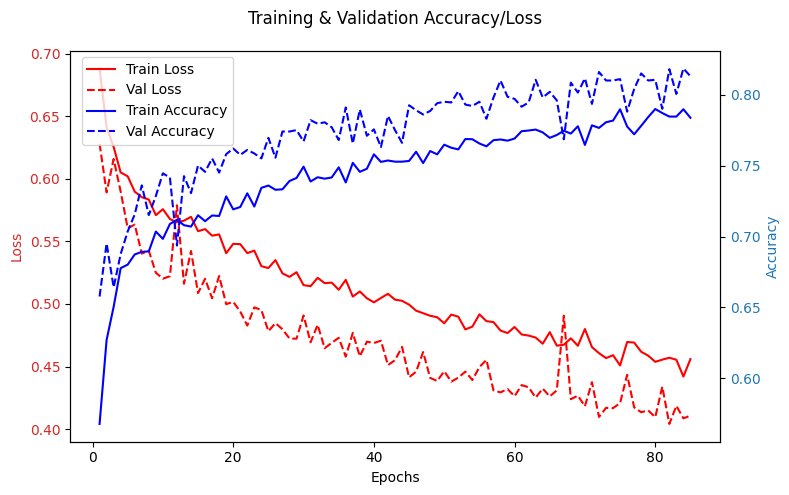

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8358 - loss: 0.3769
Test Accuracy: 0.8381


In [20]:
# evaluate the best params on test set

train_dataset, val_dataset, test_dataset = load_data(params_nn['batch_size'])

# NN
cnn = tf.keras.models.Sequential([
    # data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    
    tf.keras.layers.Rescaling(1./255),
    # first conv
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                           activation=params_nn['activation'], 
                           input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # second conv
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                           activation=params_nn['activation']),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # third conv
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), 
                           activation=params_nn['activation']),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    # flattening
    tf.keras.layers.Flatten(),
    # fully connected layer
    tf.keras.layers.Dense(256, activation=params_nn['activation']),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling the CNN
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params_nn['learning_rate']), 
            loss="binary_crossentropy", metrics=["accuracy"])

# training the CNN
history = cnn.fit(x = train_dataset, validation_data=val_dataset, epochs=params_nn['epochs'])

# plot the training accuracy/loss vs epochs
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, 'r-', label="Train Loss")
ax1.plot(epochs, val_loss, 'r--', label="Val Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, 'b-', label="Train Accuracy")
ax2.plot(epochs, val_acc, 'b--', label="Val Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Training & Validation Accuracy/Loss')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

# Evaluate the CNN on test set
loss, accuracy = cnn.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

## Tune the layers and hyperparameters

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.layers import LeakyReLU

def nn_cl_bo(filters, kernel_size, conv, layers, dense_units, 
             normalization, dropout, dropout_rate,
             max_pooling, optimizer, activation, 
             learning_rate, batch_size, epochs):
    # ranges
    optimizer_names = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 
                       'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    learning_rate_range = np.logspace(-2, -6, num=5)
    learning_rate = learning_rate_range[int(round(learning_rate))]
    optimizer_inits= {'Adam': Adam(learning_rate=learning_rate), 
                      'SGD': SGD(learning_rate=learning_rate),
                      'RMSprop': RMSprop(learning_rate=learning_rate), 
                      'Adadelta': Adadelta(learning_rate=learning_rate), 
                      'Adagrad': Adagrad(learning_rate=learning_rate), 
                      'Adamax': Adamax(learning_rate=learning_rate),
                      'Nadam': Nadam(learning_rate=learning_rate), 
                      'Ftrl': Ftrl(learning_rate=learning_rate)}
    activations = ['relu', 'sigmoid', 'softplus', 
                   'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU(0.1)]
    filters_range = [32, 64, 128, 256]
    kernel_size_range = [3, 5]
    dense_units_range = [64, 128, 256, 512]

    batch_size_range = np.logspace(3, 9, num=7, base=2, dtype=int)
    epochs_range = np.arange(25, 105, 5)
    
    # params
    optimizer = optimizer_inits[optimizer_names[int(round(optimizer))]]
    activation = activations[int(round(activation))]
    batch_size = batch_size_range[int(round(batch_size))]
    epochs = epochs_range[int(round(epochs))]
    filters = filters_range[int(round(filters))]
    dense_units = int(round(dense_units))
    conv = int(round(conv))
    layers = int(round(layers))
    kernel_size = kernel_size_range[int(round(kernel_size))]
    
    def evaluate_NN():
        cnn = tf.keras.models.Sequential()
        # data augmentation
        cnn.add(tf.keras.layers.RandomFlip("horizontal"))
        cnn.add(tf.keras.layers.RandomRotation(0.2))
        cnn.add(tf.keras.layers.RandomZoom(0.2))
        cnn.add(tf.keras.layers.RandomContrast(0.2))
        cnn.add(tf.keras.layers.RandomBrightness(0.2))
        cnn.add(tf.keras.layers.Rescaling(1./255))
        # first conv layer
        cnn.add(tf.keras.layers.Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), 
                                       activation=activation, input_shape=(64, 64, 3)))
        # additianal conv layers
        for i in range(conv):  
            cnn.add(tf.keras.layers.Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), 
                                   activation=activation))

            if normalization > 0.5:
                cnn.add(tf.keras.layers.BatchNormalization())
            
            if max_pooling > 0.5:
                cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
            if dropout > 0.5:
                cnn.add(tf.keras.layers.Dropout(round(dropout_rate, 1), seed=SEED))
         
        # flattening
        cnn.add(tf.keras.layers.Flatten())
        
        # fully connected layer
        for i in range(layers):
            cnn.add(tf.keras.layers.Dense(dense_units, activation=activation))
            
            if dropout > 0.5:
                cnn.add(tf.keras.layers.Dropout(round(dropout_rate, 1), seed=SEED))
            
        cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        
        cnn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
        
        return cnn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=10)
    nn = evaluate_NN()
    # reload data with a new batch size
    train_dataset, val_dataset, test_dataset = load_data(batch_size)
    # train
    nn.fit(x = train_dataset, validation_data=val_dataset, epochs=epochs, verbose=0)
    # evaluate
    _, accuracy = nn.evaluate(val_dataset, verbose=0)
    
    return accuracy

In [22]:
from bayes_opt import BayesianOptimization

params_nn ={
    'filters': (0, 3), 
    'kernel_size': (0, 1), 
    'conv': (1, 3), 
    'layers': (1, 3), 
    'dense_units': (0, 3), 
    'normalization': (0, 1), 
    'dropout': (0, 1), 
    'dropout_rate': (0, 0.5),
    'max_pooling': (0, 1), 
    'optimizer': (0, 7), 
    'activation': (0, 8), 
    'learning_rate':(0, 4),
    'batch_size':(0, 6),
    'epochs':(0, 15)
}

nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=SEED)
nn_bo.maximize(init_points=30, n_iter=20)

|   iter    |  target   | activa... | batch_... |   conv    | dense_... |  dropout  | dropou... |  epochs   |  filters  | kernel... |  layers   | learni... | max_po... | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.5207    | 2.996     | 5.704     | 2.464     | 1.796     | 0.156     | 0.078     | 0.8713    | 2.599     | 0.6011    | 2.416     | 0.08234   | 0.9699    | 0.8324    | 1.486     |
| 2         | 0.4978    | 1.455     | 1.1       | 1.608     | 1.574     | 0.4319    | 0.1456    | 9.178     | 0.4185    | 0.2921    | 1.733     | 1.824     | 0.7852    | 0.1997    | 3.6       |
| 3         | 0.5452    | 4.739     | 0.2787    | 2.215     | 0.5116    | 0.06505   | 0.4744    | 14.48     | 2.425     | 0.3046    | 1.195     | 2.737     | 0.4402    | 0.122     | 3.466     |
| 4         | 0.5022    | 0.27

In [23]:
nn_bo.max['params']

{'activation': 7.725615087281408,
 'batch_size': 3.851319679626819,
 'conv': 1.893464467523562,
 'dense_units': 2.9658173573224236,
 'dropout': 0.7343521273832673,
 'dropout_rate': 0.0918933080616694,
 'epochs': 6.255724212398589,
 'filters': 1.2980401821171688,
 'kernel_size': 0.5264052193311589,
 'layers': 2.223107989210164,
 'learning_rate': 1.304353442766356,
 'max_pooling': 0.9723677997057344,
 'normalization': 0.17287801415293402,
 'optimizer': 5.16385741767926}

In [25]:
# best hyperparameters
params_nn = nn_bo.max['params']

activations = ['relu', 'sigmoid', 'softplus', 
               'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU(0.1)]
optimizer_names = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 
                   'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
learning_rate_range = np.logspace(-2, -6, num=5)
dense_units_range = [64, 128, 256, 512]
filters_range = [32, 64, 128, 256]
kernel_size_range = [3, 5]
dense_units_range = [64, 128, 256, 512]
batch_size_range = np.logspace(3, 9, num=7, base=2, dtype=int)
epochs_range = np.arange(25, 105, 5)

params_nn['learning_rate'] = learning_rate_range[int(round(params_nn['learning_rate']))]
params_nn['optimizer'] = optimizer_names[int(round(params_nn['optimizer']))]
params_nn['activation'] = activations[int(round(params_nn['activation']))]
params_nn['batch_size'] = batch_size_range[int(round(params_nn['batch_size']))]
params_nn['epochs'] = epochs_range[int(round(params_nn['epochs']))]
params_nn['filters'] = filters_range[int(round(params_nn['filters']))]
params_nn['dense_units'] = dense_units_range[int(round(params_nn['dense_units']))]
params_nn['conv'] = int(round(params_nn['conv']))
params_nn['layers'] = int(round(params_nn['layers']))
params_nn['kernel_size'] = kernel_size_range[int(round(params_nn['kernel_size']))]
params_nn['normalization'] = params_nn['normalization'] > 0.5
params_nn['dropout'] = params_nn['dropout'] > 0.5
params_nn['dropout_rate'] = round(params_nn['dropout_rate'], 1)
params_nn['max_pooling'] = params_nn['max_pooling'] > 0.5

params_nn

{'activation': <LeakyReLU name=leaky_re_lu_87, built=False>,
 'batch_size': 128,
 'conv': 2,
 'dense_units': 512,
 'dropout': True,
 'dropout_rate': 0.1,
 'epochs': 55,
 'filters': 64,
 'kernel_size': 5,
 'layers': 2,
 'learning_rate': 0.001,
 'max_pooling': True,
 'normalization': False,
 'optimizer': 'Adamax'}

Epoch 1/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.5074 - loss: 0.7357 - val_accuracy: 0.5117 - val_loss: 0.6901
Epoch 2/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5519 - loss: 0.6840 - val_accuracy: 0.6062 - val_loss: 0.6628
Epoch 3/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5975 - loss: 0.6612 - val_accuracy: 0.6252 - val_loss: 0.6368
Epoch 4/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6414 - loss: 0.6355 - val_accuracy: 0.6367 - val_loss: 0.6322
Epoch 5/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6502 - loss: 0.6279 - val_accuracy: 0.6302 - val_loss: 0.6225
Epoch 6/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6529 - loss: 0.6159 - val_accuracy: 0.7111 - val_loss: 0.5675
Epoch 7/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6698 - loss: 0.6065 - val_accuracy: 0.6937 - val_loss: 0.5739
Epoch 8/55
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6952 - loss: 0.5828 - val_accuracy: 0.7221 - v

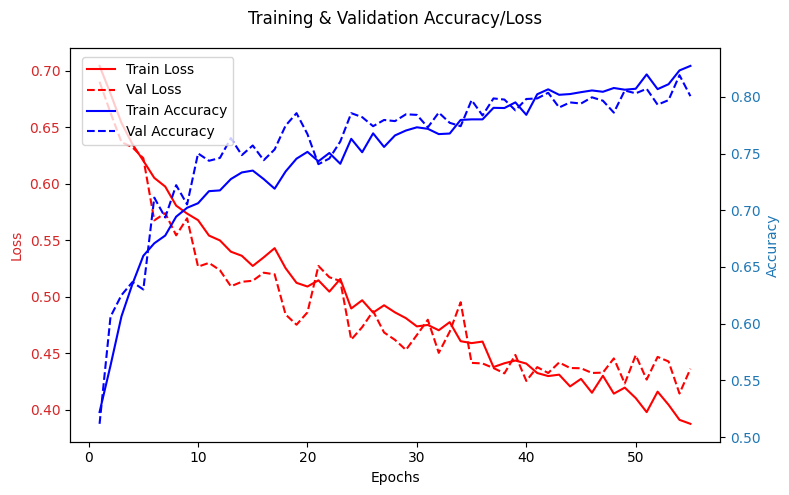

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8551 - loss: 0.3291
Test Accuracy: 0.8614


In [26]:
# evaluate the best params on test set

train_dataset, val_dataset, test_dataset = load_data(params_nn['batch_size'])

learning_rate = params_nn['learning_rate']
optimizer_inits= {'Adam': Adam(learning_rate=learning_rate), 
                      'SGD': SGD(learning_rate=learning_rate),
                      'RMSprop': RMSprop(learning_rate=learning_rate), 
                      'Adadelta': Adadelta(learning_rate=learning_rate), 
                      'Adagrad': Adagrad(learning_rate=learning_rate), 
                      'Adamax': Adamax(learning_rate=learning_rate),
                      'Nadam': Nadam(learning_rate=learning_rate), 
                      'Ftrl': Ftrl(learning_rate=learning_rate)}

# NN
cnn = tf.keras.models.Sequential()
# data augmentation
cnn.add(tf.keras.layers.RandomFlip("horizontal"))
cnn.add(tf.keras.layers.RandomRotation(0.2))
cnn.add(tf.keras.layers.RandomZoom(0.2))
cnn.add(tf.keras.layers.RandomContrast(0.2))
cnn.add(tf.keras.layers.RandomBrightness(0.2))
cnn.add(tf.keras.layers.Rescaling(1./255))
# first conv layer
cnn.add(tf.keras.layers.Conv2D(filters=params_nn["filters"], 
                               kernel_size=(params_nn["kernel_size"], params_nn["kernel_size"]), 
                               activation=params_nn["activation"], input_shape=(64, 64, 3)))
# additianal conv layers
for i in range(params_nn["conv"]):  
    cnn.add(tf.keras.layers.Conv2D(filters=params_nn["filters"], 
                               kernel_size=(params_nn["kernel_size"], params_nn["kernel_size"]), 
                               activation=params_nn["activation"]))

    if params_nn["normalization"]:
        cnn.add(tf.keras.layers.BatchNormalization())
                
    if params_nn["max_pooling"]:
        cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
            
    if params_nn["dropout"] > 0.5:
        cnn.add(tf.keras.layers.Dropout(params_nn["dropout_rate"], seed=SEED))
         
# flattening
cnn.add(tf.keras.layers.Flatten())
        
# fully connected layer
for i in range(params_nn["layers"]):
    cnn.add(tf.keras.layers.Dense(params_nn["dense_units"], activation=params_nn["activation"]))
            
    if params_nn["dropout"] > 0.5:
        cnn.add(tf.keras.layers.Dropout(params_nn["dropout_rate"], seed=SEED))
            
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compiling the CNN
cnn.compile(optimizer=optimizer_inits[params_nn['optimizer']], 
            loss="binary_crossentropy", metrics=["accuracy"])

# training the CNN
history = cnn.fit(x = train_dataset, validation_data=val_dataset, epochs=params_nn['epochs'])

# plot the training accuracy/loss vs epochs
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, 'r-', label="Train Loss")
ax1.plot(epochs, val_loss, 'r--', label="Val Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, 'b-', label="Train Accuracy")
ax2.plot(epochs, val_acc, 'b--', label="Val Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Training & Validation Accuracy/Loss')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

# Evaluate the CNN on test set
loss, accuracy = cnn.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")